Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [14]:
from random import random, seed
from itertools import product
import numpy as np
import timeit
from typing import Tuple
from icecream import ic
from tqdm.auto import tqdm
from matplotlib import pyplot as plt
from itertools import accumulate
from itertools import compress

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [15]:
UNIVERSE_SIZE = 10000
NUM_SETS = 1000

DENSITY = 0.2
listTest=[(100,10,0.2),(1000,100,0.2),(10000,1000,0.2),(100000,10000,0.2),(100000,10000,0.1),(100000,10000,0.3)]
rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [16]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)


In [17]:
mincost=min(COSTS)

## Helper Functions

In [18]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def valid2(solution):
    """Checks whether solution is valid (i.e., covers all universe)"""
    # Logical OR over selected sets
    covered_universe = np.zeros(SETS.shape[1], dtype=bool)
    
    for i in np.where(solution)[0]:  # Only loop through 'True' solutions
        covered_universe |= SETS[i]
        # Exit early if the universe is fully covered
        if np.all(covered_universe):
            return True
    
    # Check if universe is fully covered at the end
    return np.all(covered_universe)

def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()



In [19]:
len(SETS)

1000

## Have Fun!

In [20]:
# A dumb solution of "all" sets
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)

t1 = timeit.timeit(lambda: cost(solution), number=100)
ic(t1)


ic| t1: 0.0034496929999932036


0.0034496929999932036

In [21]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
ic(solution,len(solution))
valid(solution), cost(solution)

ic| solution: array([ True,  True,  True,  True, False, False,  True,  True, False,
                      True,  True,  True, False,  True,  True,  True, False, False,
                     False, False,  True, False, False,  True,  True,  True,  True,
                      True, False,  True, False,  True, False,  True,  True, False,
                      True, False, False, False,  True, False,  True, False, False,
                     False,  True, False, False,  True,  True, False, False,  True,
                      True, False,  True,  True, False, False, False, False,  True,
                     False,  True, False, False, False, False,  True, False, False,
                      True, False, False,  True,  True,  True, False,  True,  True,
                     False, False,  True,  True, False,  True,  True,  True, False,
                      True, False,  True,  True,  True, False, False, False, False,
                      True,  True, False, False, False, False,  True,  True,

(np.True_, np.float64(2136746.5135341915))

In [22]:
def fitness(solution : np.array)-> int:
    costo=-cost(solution)
    #if valid2(solution):
       
       #costo=costo+50000
        #ic(pos)
        
    
    return costo

def fitness2(solution : np.array)-> Tuple[bool,int]:
    costo=-cost(solution)
    #costo=-(len(np.where(solution == True)[0]) *100)
    validity=False
    if valid2(solution):
       
       
       validity=True
        #ic(pos)
        
    
    return (validity,costo)

tweak :Simple tweak only swap a random value of the solution , results aren't great 

In [23]:



def tweak(solution : np.array)-> np.array:    
    new_solution = solution.copy()
    pos = rng.integers(0,NUM_SETS)
    
    
    new_solution[pos] = not new_solution[pos]
    return new_solution

In [24]:
def tweak2(solution : np.array)-> np.array:   #non funziona
    n_tweaks=5
    new_solution = solution.copy()
    pos = rng.integers(0,NUM_SETS)
    current_solution=solution.copy()
    current_fit=fitness(solution)
    

    for step in range(n_tweaks):
        new_solution[pos] = not new_solution[pos]
        sol_fit=fitness(solution)
       
        if sol_fit>current_fit:
            current_solution = new_solution[:]
            current_fit=sol_fit
        
        new_solution[pos] = not new_solution[pos]
    
    
    
    return current_solution

tweak3 : it flips multiple elemts in the solution . If i just started exploring it changes a lot of elemnts , if i already explored enough it changes only few elements. Works well if i increse number of steps, getting better results but it takes more time then my main solution (tweak5 + tweak 6)

In [54]:
def tweak3(solution : np.array,step: int,max_step :int)-> np.array:
    #size_change=1
    #size_change=1+(2*(max_step -step))//max_step
    #size_change=1+((max_step -step))//max_step
    size_change=(20*(max_step -step))//max_step
    
    new_solution = solution.copy()
    
    rints = rng.integers(low=0, high=NUM_SETS, size=size_change)
    for el in rints:
        new_solution[el] = not new_solution[el]

    
    
    
    
    return new_solution










def tweak5(solution : np.array,step: int,max_step :int,)-> np.array:
    #size_change=1
    #size_change=1+(2*(max_step -step))//max_step
    #size_change=1+((max_step -step))//max_step
    size_change = int(np.log10(UNIVERSE_SIZE)) * 2*(max_step - step) // max_step    
    new_solution = solution.copy()
    
    if valid2(new_solution):
        
            index_true=np.where(new_solution==True)[0]
            if( size_change>len(index_true)):
                size_change=len(index_true)*20//100
            rints = rng.choice(index_true, size=size_change, replace=False)
            #for el in rints:
            new_solution[rints] = False
    
    else:
         
        #if ((max_step -step)/max_step)<0.05:
            index_true=np.where(new_solution==False)[0]
            if( size_change>len(index_true)):
                size_change=len(index_true)*20//100
            rints = rng.choice(index_true, size=size_change, replace=False)
            #for el in rints:
            new_solution[rints] = True
               
       # else:
         #   rints = rng.integers(low=0, high=NUM_SETS, size=size_change)
        #    for el in rints:
        #            new_solution[el] = not new_solution[el]

    return new_solution






def tweak6(solution : np.array,size_change: int)-> np.array:
    #size_change=1
    #size_change=1+(2*(max_step -step))//max_step
    #size_change=1+((max_step -step))//max_step
   
    perc_change=33
    new_solution = solution.copy()

    
    
        
    index_true=np.where(new_solution==True)[0]
    #if( size_change>len(index_true)):
    size_change=len(index_true)*70//100
    rints1 = rng.choice(index_true, size=size_change, replace=False)
    
    
   
         
        #if ((max_step -step)/max_step)<0.05:
    index_true=np.where(new_solution==False)[0]
    #if( size_change>len(index_true)):
    size_change=len(index_true)*20//100
    rints = rng.choice(index_true, size=size_change, replace=False)
    #for el in rints:
    new_solution[rints] = True
    
    #for el in rints1:
    new_solution[rints1] = False
               
       # else:
         #   rints = rng.integers(low=0, high=NUM_SETS, size=size_change)
        #    for el in rints:
        #            new_solution[el] = not new_solution[el]

    return new_solution

tweak4 : checks if the current solution is alredy valid , if it's valid and i'm near the end , i try to flip an element( small step) and see if the solution get better , if it's valid and i'm not near the end i try to flip elemt from true to false to decreadse the cost ( i don't do it near the end or i risk getting an invalid solution ). If the current solution is not valid , i try to flip some elements 

In [ ]:
def tweak4(solution : np.array,step: int,max_step :int,)-> np.array:
    #size_change=1
    #size_change=1+(2*(max_step -step))//max_step
    #size_change=1+((max_step -step))//max_step
    size_change=(20*(max_step -step))//max_step
    
    new_solution = solution.copy()
    
    if valid2(new_solution):
        if ((max_step -step)/max_step)<0.05 :
            
            rints = rng.integers(low=0, high=NUM_SETS, size=size_change)
            for el in rints:
                    new_solution[el] = not new_solution[el]
        

        else:
            index_true= np.where(new_solution == True)[0]
            rints = rng.choice(index_true, size=size_change, replace=False)
            for el in rints:
                new_solution[el] = False
    
    else:
         rints = rng.integers(low=0, high=NUM_SETS, size=size_change)
         for el in rints:
                new_solution[el] = not new_solution[el]


    
    
    
    
    return new_solution



ic| current_solution: array([False, False, False, False

, False, False, False, False, False,
                             False, False, False, False, False, False, False, False, False,
                             False, False, False, False, False, False, False, False, False,
                             False, False, False, False, False, False, False, False,  True,
                             False, False, False, False, False, False, False, False, False,
                             False, False, False,  True, False, False, False, False, False,
                             False, False, False, False, False, False, False, False, False,
                             False,  True, False, False, False, False, False, False, False,
                             False, False, False, False, False, False, False, False, False,
                             False, False, False, False, False, False, False, False, False,
                             False, False, False, False, False, False, False, False, False,
                             False, False, 

  0%|          | 0/1 [00:00<?, ?it/s]

ic| num_true: 100
ic| costofinale: np.float64(128660.43139729794)
    valid(defsol): np.True_
ic| history.index(defit[1]): 6


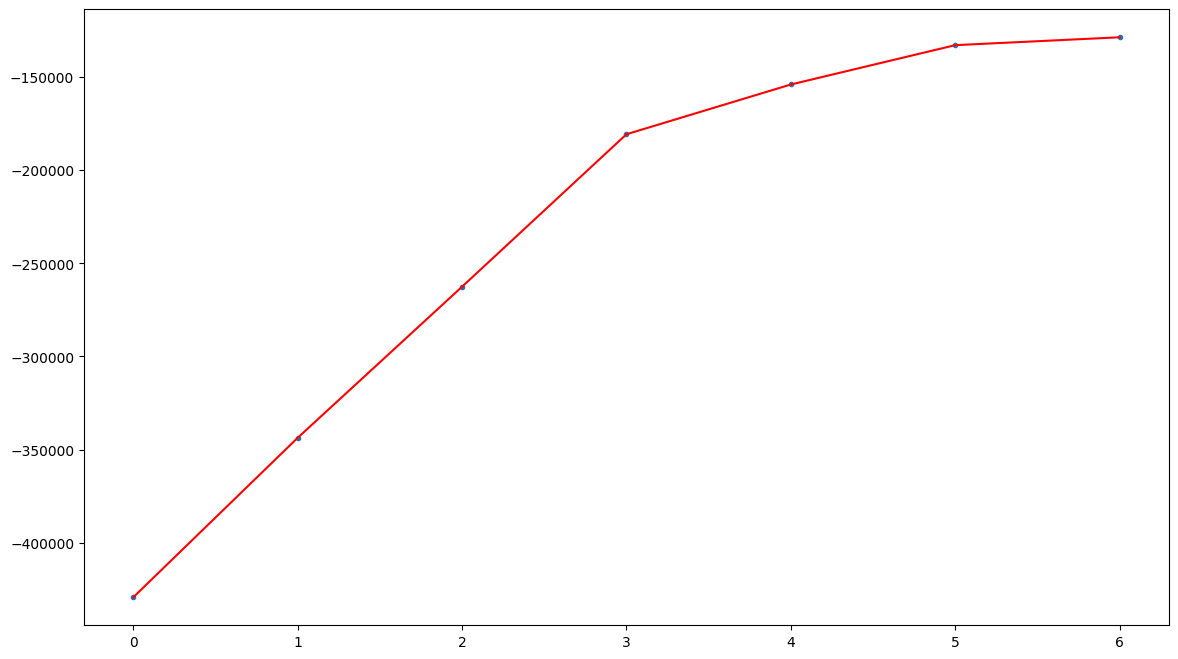

In [66]:
current_solution = solution[:]

max_steps=100*UNIVERSE_SIZE//10  # no improvement in increasing 


n_restart=1 # around 5 % imporvement 
ic( current_solution)
#while  valid(current_solution)==False or steps<max_steps:

#current_fit=fitness(current_solution)
#tcost=timeit.timeit(lambda: cost(current_solution), number=100000)
#tfittweak=timeit.timeit(lambda: tweak(current_solution), number=100000)

#tevalu=timeit.timeit(lambda: fitness(current_solution), number=10)
#tevalid=timeit.timeit(lambda: valid(current_solution), number=1000)
#tevalid2=timeit.timeit(lambda: valid2(current_solution), number=1000)
#ic(tcost,tfittweak,tevalu,tevalid,tevalid2)

history = []
dim_step_out=100

for nres in tqdm(range(n_restart)):
    i=0
    #num_true=int((100-(nres)*(100/n_restart))*NUM_SETS/100)
    num_true=int(10*NUM_SETS/100)
    ic(num_true)
    current_solution = np.zeros(NUM_SETS, dtype=bool)  # Initialize with all False
    true_indices = rng.choice(NUM_SETS, num_true, replace=False)  # Randomly pick indices to set to True
    current_solution[true_indices] = True  # Set those indices to True
    #current_solution = rng.random(NUM_SETS) < ((1+nres)*(100/n_restart))
    #ic(current_solution, nres)
    current_fit=fitness2(current_solution)
    if(nres==0):  #the first solution is always right because it's all true
        defsol=current_solution[:]
        defit=fitness2(defsol)
        #history.append(cost(defsol))
        history.append(fitness2(defsol)[1])



    for step in range(max_steps):
        i+=1

        
        
        if(i%(3*max_steps//10)==0 ):
            #for  j in tqdm(range(10)):
            #solution = tweak6(solution,dim_step_out)
            solution = tweak4(current_solution,step,max_steps)
            
            i=0
            current_solution=solution[:]
            current_fit=fitness2(solution)
        else:
            solution = tweak4(current_solution,step,max_steps)
            #solution = tweak5(current_solution,step,max_steps)
        #ic( current_solution,solution)
        sol_fit=fitness2(solution)

        
        
        #history.append(cost(solution))



    
        '''if sol_fit>current_fit :
            current_solution = solution
            current_fit=sol_fit
            i=0
            if sol_fit>defit:
                defsol = solution[:]
                defit=sol_fit
        '''
        if sol_fit[0] and sol_fit[1]>current_fit[1] :
            history.append(sol_fit[1])
            current_solution = solution
            current_fit=sol_fit
            i=0
            if sol_fit[0] and sol_fit[1]>defit[1]:
                defsol = solution[:]
                defit=sol_fit
               
        

        #if(i>=max_steps/10):
        #    break

            #ic(step, current_solution)
 
costofinale=cost(defsol)
ic(costofinale,valid(defsol))

ic(history.index(defit[1]))
#nrun=history.index(cost(defsol))//max_steps +1
#ic(history.index(defit[1]),nrun )

index_true=len(np.where(defsol==True)[0])


plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")


with open('log.txt', 'a') as file:
    
    file.write(f"{UNIVERSE_SIZE} , {NUM_SETS} , {DENSITY} , {max_steps} , {n_restart} , {costofinale} \n")

#plt.ylim(71443,2414430)